LUIZ DA SILVA MOURA 
11611EMT028

Imports necessarios


In [21]:
import matplotlib.pyplot as plt
import numpy as np
import random
import concurrent.futures
import planta
import math

In [22]:
def mult_aval(people):
    people_aval = np.array([])
    with concurrent.futures.ProcessPoolExecutor() as executor:
        for inp, response in zip(people, executor.map(planta.aval_model, people)):
            if (math.isnan(response)):
                inp[3] = 0
            else:
                inp[3] = response
            if(len(people_aval) > 0):
                people_aval = np.append(people_aval,[inp], axis=0)
            else:
                people_aval = np.array([inp])
    return people_aval


função de avaliação

In [6]:
def mult_aval(people):
    people_aval = np.array([])
    with concurrent.futures.ProcessPoolExecutor() as executor:
        for inp, response in zip(people, executor.map(planta.aval_model, people)):
            inp[3] = response
            if(len(people_aval) > 0):
                people_aval = np.append(people_aval,[inp], axis=0)
            else:
                people_aval = np.array([inp])
    return people_aval


metodo de seleção

In [7]:
def random_ranking(pesos):
    sumpos = pesos[0]/sum(pesos)
    ran = random.uniform(0,1)
    lucky = 0
    while(sumpos<ran):
        lucky = lucky+1
        sumpos  = sumpos  +  (lucky/sum(pesos))
    return(lucky)
positions = np.linspace(1,10,10)
#print(random_ranking(positions))

cruzmento


In [8]:
def crossover(father, mother):
    ran = random.uniform(0, 1)
    son1 = np.zeros(4)
    son2 = np.zeros(4)
    V_1 = np.zeros(3)
    V_2 = np.zeros(3)
    for i in range(len(father)-1):
        son1[i] = (ran * father[i]) + (1- ran) * mother[i]
        son2[i] = (ran * mother[i]) + (1- ran) * father[i]
        V_1[i] = ((father[i] + mother[i])/abs(father[i] + mother[i])) *father[i]
        V_2[i] = ((father[i] + mother[i])/abs(father[i] + mother[i])) *mother[i]
    return son1,son2,V_1,V_2 

In [9]:
#adiciona somente se nao tem repetido
def Addson(sons,son, index):
    #print('in{}//->//'.format(index))
    #if(len(np.where((sons[:]==son).all(1))[0]) == 0 ):
    print(sons)
    print(index)
    print(son)
    for i in range(len(son)):
        sons[index][i] = son[i]
    return True
    #return False
sons = [0,0,0]
for i in range(len(sons)):
        sons[i] = 1
print(sons)

[1, 1, 1]


TRAIN'S PARAM

In [10]:
Kp_i = 3.176729398248033
Ki_i = 41.74
Kd_i = 10.435

n_parti = 25
people = np.zeros([n_parti,4]) #Kp Ki Kd , fa
v_people =  np.zeros([n_parti,3])#velocidade do enxame
c1 = 0.7
c2 = 1.43
w = 0.8
rang = 95/100# ex 95%
n_gera = 100
FatAg = 0.000095
T_crossover = 0.8



Init population

In [23]:
for i in range(n_parti):
    repeat = True
    new_people = np.zeros(4)
    while (repeat):
        new_people[0] = random.uniform(Kp_i- (Kp_i*rang), Kp_i+ (Kp_i*rang))
        new_people[1] = random.uniform(Ki_i- (Ki_i*rang), Ki_i+ (Ki_i*rang))
        new_people[2] = random.uniform(Kd_i- (Kd_i*rang), Kd_i+ (Kd_i*rang))
        if(len(np.where((people[:]==new_people).all(1))[0]) == 0 ):
            people[i][0] = new_people[0]
            people[i][1] = new_people[1]
            people[i][2] = new_people[2]
            v_people[0] = random.uniform(0, 1)
            v_people[1] = random.uniform(0, 1)
            v_people[2] = random.uniform(0, 1)
            repeat = False
print(people)

[[ 1.99980989 60.91299589 19.79303257  0.        ]
 [ 0.95399017 27.75779016  3.47231823  0.        ]
 [ 4.57917003 27.23847599  1.16647214  0.        ]
 [ 3.53463744 41.93965346  4.56786134  0.        ]
 [ 1.61411702 17.44261735 15.80997132  0.        ]
 [ 5.61117499 12.85539029 16.73855383  0.        ]
 [ 4.60772647 47.56311847 12.19614596  0.        ]
 [ 2.34593511 23.32305218 18.62518569  0.        ]
 [ 4.65151212 81.2430428   9.38745498  0.        ]
 [ 4.29348655 57.99776956 10.99334826  0.        ]
 [ 0.82229065 22.96133069  4.56575061  0.        ]
 [ 3.23402665 21.61969673 10.53049226  0.        ]
 [ 5.43998765 53.33622119  8.51561462  0.        ]
 [ 4.00071688 26.24791714 14.08604223  0.        ]
 [ 6.09497535 60.21275965 13.27721495  0.        ]
 [ 0.36198314  9.00967906  5.07088009  0.        ]
 [ 3.29897307 66.1538785  10.97026285  0.        ]
 [ 0.83800743 36.88391656 17.32679285  0.        ]
 [ 5.70938589 34.49250643  1.20943931  0.        ]
 [ 0.21397115 53.23532279  5.83

TRAIN

In [24]:
betters = [[Kp_i,Ki_i,Kd_i,planta.aval_model([Kp_i,Ki_i,Kd_i])]]
better_global = betters
ger = 0
while(ger<= n_gera):
    #avalia enxame
    print('geração {} =>{}'.format(ger,better_global))
    print(people)
    p = mult_aval(people)# calculo do fa
    population = p[p[:,3].argsort()]
    print(population)
    #acina o melhor local em uma lista
    betters = np.append(betters,[population[n_parti-1]], axis=0)
    #pega o melhor global 
    better_global = p[p[:,3].argsort()][n_parti-1]
    if(n_gera == ger):
        break
    if(better_global[3] > FatAg ):
        break
    r1 = random.uniform(0,1)
    r2 = random.uniform(0,1)
    ind_mom = -1
    ind_dad = -1
    for p in range(n_parti):
        for i in range(len(population[0][:])-1):
            v_people[p][i] = (w*v_people[p][i]) +(c1*r1*(betters[ger][i]-population[p][i])) + (c1*r1*(better_global[i]-population[p][i]))
            population[p][ i] = population[p][i] + v_people[p][i]
        #crossover 
        p_cross = random.uniform(0,1)
        if(p_cross > T_crossover):
            if(ind_mom ==-1):
                ind_mom = p
            elif(ind_dad ==-1):
                ind_dad = p
            else:
                son1,son2,V_1,V_2  = crossover(population[ind_dad][:],population[ind_mom][:])
                Addson(population, son1, ind_dad)
                Addson(population, son2, ind_mom)
                Addson(v_people, V_1, ind_dad)
                Addson(v_people, V_2, ind_mom)
                ind_mom = -1
                ind_dad = -1
                print('caiu')
        #end crossover
    people = population
    ger = ger + 1

c:\Python39\lib\site-packages\control\timeresp.py:941: UserWarning: Non-zero initial condition given for transfer function system. Internal conversion to state space used; may not be consistent with given X0.
  warnings.warn(


geração 0 =>[[3.176729398248033, 41.74, 10.435, 2.1793575104129648e-08]]
[[ 1.99980989 60.91299589 19.79303257  0.        ]
 [ 0.95399017 27.75779016  3.47231823  0.        ]
 [ 4.57917003 27.23847599  1.16647214  0.        ]
 [ 3.53463744 41.93965346  4.56786134  0.        ]
 [ 1.61411702 17.44261735 15.80997132  0.        ]
 [ 5.61117499 12.85539029 16.73855383  0.        ]
 [ 4.60772647 47.56311847 12.19614596  0.        ]
 [ 2.34593511 23.32305218 18.62518569  0.        ]
 [ 4.65151212 81.2430428   9.38745498  0.        ]
 [ 4.29348655 57.99776956 10.99334826  0.        ]
 [ 0.82229065 22.96133069  4.56575061  0.        ]
 [ 3.23402665 21.61969673 10.53049226  0.        ]
 [ 5.43998765 53.33622119  8.51561462  0.        ]
 [ 4.00071688 26.24791714 14.08604223  0.        ]
 [ 6.09497535 60.21275965 13.27721495  0.        ]
 [ 0.36198314  9.00967906  5.07088009  0.        ]
 [ 3.29897307 66.1538785  10.97026285  0.        ]
 [ 0.83800743 36.88391656 17.32679285  0.        ]
 [ 5.7093

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

In [81]:
print(people)

[[-3.85714574e+03 -5.46752516e+02 -7.20128910e+04  1.17562813e-04]
 [-3.63903178e+03 -5.15606959e+02 -6.76160757e+04  1.04134121e-04]
 [-3.44843128e+03 -4.89559340e+02 -6.43401642e+04  9.38936045e-05]
 [-3.34766154e+03 -4.76111064e+02 -6.23171046e+04  8.82800835e-05]
 [-3.31575701e+03 -4.70753701e+02 -6.16346435e+04  8.64801121e-05]
 [-3.28700792e+03 -4.66462152e+02 -6.12905196e+04  8.52515036e-05]
 [-3.29155971e+03 -4.66073094e+02 -6.11766779e+04  8.52106982e-05]
 [-3.29043856e+03 -4.68989089e+02 -6.06836463e+04  8.44927887e-05]
 [-3.25730132e+03 -4.60559845e+02 -6.06008126e+04  8.35294850e-05]
 [-3.27593871e+03 -4.64322605e+02 -6.10496045e+04  8.46301494e-05]
 [-3.22537559e+03 -4.58775137e+02 -6.01605009e+04  8.21087963e-05]
 [-3.26753588e+03 -4.64198798e+02 -6.10481952e+04  8.44111497e-05]
 [-3.18071739e+03 -4.52741514e+02 -5.99989769e+04  8.07554877e-05]
 [-3.17096009e+03 -4.48926897e+02 -5.92465130e+04  7.94965662e-05]
 [-3.17269330e+03 -4.51601616e+02 -5.91523689e+04  7.94126366e

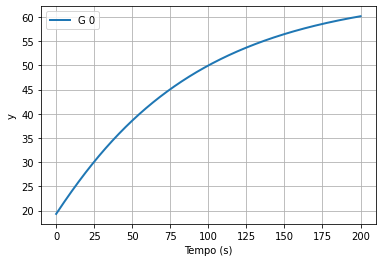

In [26]:
planta.plot(betters)


In [25]:
planta.plot([betters[0],betters[10],betters[len(betters)-1]])
planta.plot([better_global])
planta.plot([betters[0]])
print(betters)

IndexError: list index out of range

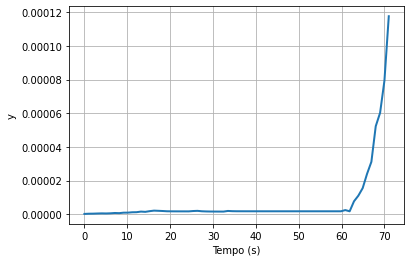

In [83]:
plt.figure()
plt.plot(np.linspace(0,len(betters),len(betters)), betters.T[3], lw=2)
plt.xlabel('Tempo (s)')
plt.ylabel('y')
plt.grid()
plt.show()

In [11]:
p = np.array([[1,1,2,3],[1,1,2,3]])
print(len(p[0][:]))
v = np.zeros((n_parti,3))
x = np.zeros((n_parti,3))
for v_cal, x_cal in zip(v,x):
    v_cal = [1,1,-1]
    x_cal = [1,1,-1]
    print(x_cal)
print(x)

4
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[1, 1, -1]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
